import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

TRAIN_PATH = 'train.parquet'
TEST_PATH = 'test.parquet'
SAMPLE_SUB_PATH = 'sample_submission.csv'

In [6]:
print('Loading data...')
train = pd.read_parquet(TRAIN_PATH, engine='pyarrow')
test = pd.read_parquet(TEST_PATH, engine='pyarrow')
sample_sub = pd.read_csv(SAMPLE_SUB_PATH, nrows=5)
print('Loaded!')

Loading data...
Loaded!


In [16]:
# Basic Info

print('--- TRAIN INFO ---')
print(f'Shape: {train.shape}')
print(f'Columns: {list(train.columns)}')
print('Data types:')
print(train.dtypes)
print('Memory usage:')
train.info(memory_usage='deep')

print('--- TEST INFO ---')
print(f'Shape: {test.shape}')
print(f'Columns: {list(test.columns)}')
print('Data types:')
print(test.dtypes)
print('Memory usage:')
test.info(memory_usage='deep')

print('--- SAMPLE SUBMISSION ---')
display(sample_sub)

--- TRAIN INFO ---
Shape: (525886, 786)
Columns: ['bid_qty', 'ask_qty', 'buy_qty', 'sell_qty', 'volume', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21', 'X22', 'X23', 'X24', 'X25', 'X26', 'X27', 'X28', 'X29', 'X30', 'X31', 'X32', 'X33', 'X34', 'X35', 'X36', 'X37', 'X38', 'X39', 'X40', 'X41', 'X42', 'X43', 'X44', 'X45', 'X46', 'X47', 'X48', 'X49', 'X50', 'X51', 'X52', 'X53', 'X54', 'X55', 'X56', 'X57', 'X58', 'X59', 'X60', 'X61', 'X62', 'X63', 'X64', 'X65', 'X66', 'X67', 'X68', 'X69', 'X70', 'X71', 'X72', 'X73', 'X74', 'X75', 'X76', 'X77', 'X78', 'X79', 'X80', 'X81', 'X82', 'X83', 'X84', 'X85', 'X86', 'X87', 'X88', 'X89', 'X90', 'X91', 'X92', 'X93', 'X94', 'X95', 'X96', 'X97', 'X98', 'X99', 'X100', 'X101', 'X102', 'X103', 'X104', 'X105', 'X106', 'X107', 'X108', 'X109', 'X110', 'X111', 'X112', 'X113', 'X114', 'X115', 'X116', 'X117', 'X118', 'X119', 'X120', 'X121', 'X122', 'X123', 'X124', 'X125', 'X1

,ID,prediction
0,1,-0.280233
1,2,1.371969
2,3,-2.045252
3,4,-1.447555
4,5,-1.303901


In [ ]:
## FOR TRAIN DATA: 

In [8]:
# display first 5 rows & stats summary
display(train.head())
display(train.describe(include='all'))

,bid_qty,ask_qty,buy_qty,sell_qty,volume,X1,X2,X3,X4,X5,...,X772,X773,X774,X775,X776,X777,X778,X779,X780,label
2023-03-01 00:00:00,15.283,8.425,176.405,44.984,221.389,0.181844,-0.637860,0.006652,0.136870,0.116698,...,0.333753,-0.009992,-0.695595,-0.444077,-0.191238,-0.184251,-0.471897,-0.625428,-0.553991,0.562539
2023-03-01 00:01:00,38.590,2.336,525.846,321.950,847.796,0.489497,-0.075619,0.431594,0.522400,0.475255,...,0.333657,-0.010040,-0.696226,-0.452866,-0.200082,-0.188929,-0.472842,-0.625832,-0.554426,0.533686
2023-03-01 00:02:00,0.442,60.250,159.227,136.369,295.596,0.260121,-0.444684,0.100695,0.224729,0.203282,...,0.333667,-0.010037,-0.696832,-0.461383,-0.208786,-0.193571,-0.473785,-0.626236,-0.554860,0.546505
2023-03-01 00:03:00,4.865,21.016,335.742,124.963,460.705,0.099976,-0.666728,-0.123858,0.019197,0.014459,...,0.333174,-0.010279,-0.697391,-0.469628,-0.217350,-0.198175,-0.474726,-0.626639,-0.555294,0.357703
2023-03-01 00:04:00,27.158,3.451,98.411,44.407,142.818,0.270893,-0.325973,0.116336,0.234311,0.214073,...,0.333171,-0.010283,-0.697940,-0.477622,-0.225780,-0.202745,-0.475666,-0.627043,-0.555728,0.362452


,bid_qty,ask_qty,buy_qty,sell_qty,volume,X1,X2,X3,X4,X5,...,X772,X773,X774,X775,X776,X777,X778,X779,X780,label
count,525886.000000,525886.000000,525886.000000,525886.000000,525886.000000,525886.000000,525886.000000,525886.000000,525886.000000,525886.000000,...,525886.000000,525886.000000,525886.000000,525886.000000,525886.000000,525886.000000,525886.000000,525886.000000,525886.000000,525886.000000
mean,9.967948,10.174161,131.712690,132.660088,264.372778,-0.033823,-0.000269,-0.000307,-0.000318,-0.000339,...,0.169216,-0.000665,-0.003549,-0.003592,-0.003638,-0.003692,-0.003864,-0.004136,-0.004453,0.036126
std,15.645712,15.889598,307.184897,309.728730,588.457585,0.912125,0.937410,0.933608,0.930464,0.927752,...,1.091819,0.719549,1.001749,1.001578,1.001470,1.001483,1.002343,1.003870,1.005657,1.009915
min,0.001000,0.001000,0.000000,0.000000,0.000000,-4.746617,-8.953153,-7.410052,-6.615129,-5.699821,...,-0.363418,-0.335636,-0.703567,-0.717573,-0.731755,-0.751271,-0.807807,-0.889107,-1.071562,-24.416615
25%,2.634000,2.678000,26.407000,27.020250,60.687000,-0.651589,-0.479696,-0.534022,-0.566194,-0.589776,...,0.046842,-0.027904,-0.703344,-0.717306,-0.731416,-0.749811,-0.760165,-0.794947,-0.892474,-0.381586
50%,6.415000,6.538000,57.015000,58.044500,120.790500,-0.050707,-0.002515,-0.003520,-0.004139,-0.004894,...,0.177288,-0.010883,-0.702681,-0.716097,-0.725053,-0.692477,-0.605916,-0.620694,-0.431237,0.016261
75%,13.085000,13.330000,127.626000,129.100500,256.730750,0.567883,0.473859,0.522680,0.551433,0.574631,...,0.227693,-0.000665,1.366824,1.392614,1.377218,1.321203,1.010719,0.918046,0.830857,0.434137
max,1114.932000,1352.965000,17609.567000,17685.503000,28685.346000,5.013179,9.395434,7.849541,6.941699,6.358501,...,275.342873,162.311004,1.522945,1.553585,1.584682,1.627729,1.765409,1.944191,2.093401,20.740270


In [10]:
# missing values & patterns

missing = train.isnull().sum()
missing = missing[missing > 0]
if not missing.empty:
    display(missing)
    print('Missing value patterns:')
    display(train[missing.index].isnull().mean())
else:
    print('No missing values found.')

No missing values found.


In [11]:
# Target variables

target_candidates = [col for col in train.columns if 'target' in col.lower() or 'y' == col.lower() or 'return' in col.lower()]
if not target_candidates:
    # Try to infer from sample submission
    target_candidates = [col for col in sample_sub.columns if col in train.columns]

if target_candidates:
    target_col = target_candidates[0]
    print(f'Target column: {target_col}')
    display(train[target_col].describe())
    print(f'Unique values: {train[target_col].nunique()}')
    display(train[target_col].value_counts().head(10))
    # Distribution plot
    plt.figure(figsize=(8,4))
    sns.histplot(train[target_col], bins=100, kde=True)
    plt.title(f'Target Distribution: {target_col}')
    plt.show()
else:
    print('No obvious target column found. Please check column names.')
    target_col = None

No obvious target column found. Please check column names.


In [12]:
# target over time (if time column exists)

time_cols = [col for col in train.columns if any(x in col.lower() for x in ['time', 'date', 'ts', 'stamp'])]
if time_cols and target_col:
    time_col = time_cols[0]
    print(f'Time column: {time_col}')
    display(train[time_col].describe())
    # Plot target over time
    plt.figure(figsize=(12,5))
    plt.plot(train[time_col], train[target_col], '.', alpha=0.2)
    plt.xlabel(time_col)
    plt.ylabel(target_col)
    plt.title(f'{target_col} over {time_col}')
    plt.show()
else:
    if not time_cols:
        print('No obvious time-related column found.')
    if not target_col:
        print('Skipping target over time plot (no target column).')

No obvious time-related column found.
Skipping target over time plot (no target column).


In [13]:
# any time columns?

if time_cols:
    print('Potential time columns:', time_cols)
else:
    print('No time-related columns detected.')

No time-related columns detected.


Target column: label


count    525886.000000
mean          0.036126
std           1.009915
min         -24.416615
25%          -0.381586
50%           0.016261
75%           0.434137
max          20.740270
Name: label, dtype: float64

Unique values: 525886


label
 0.562539    1
-0.080454    1
-0.531737    1
-0.421255    1
-0.377301    1
-0.278581    1
-0.205861    1
-0.334391    1
-0.423781    1
-0.442802    1
Name: count, dtype: int64

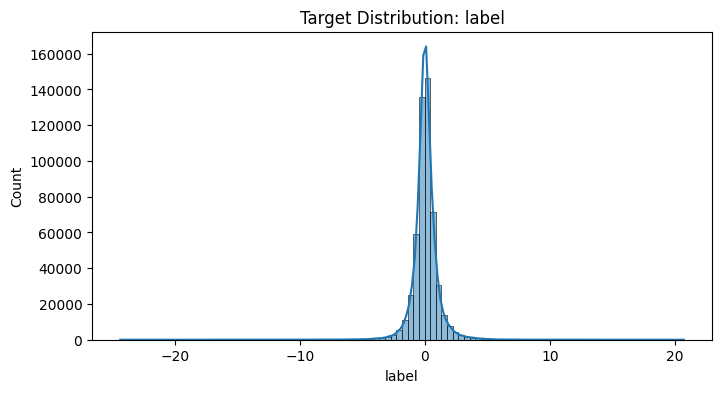

In [14]:
# target columns

target_col = 'label'
print(f'Target column: {target_col}')
display(train[target_col].describe())
print(f'Unique values: {train[target_col].nunique()}')
display(train[target_col].value_counts().head(10))
plt.figure(figsize=(8,4))
sns.histplot(train[target_col], bins=100, kde=True)
plt.title(f'Target Distribution: {target_col}')
plt.show()

Time column is the DataFrame index.
Time range: 2023-03-01 00:00:00 to 2024-02-29 23:59:00
Number of unique timestamps: 525886


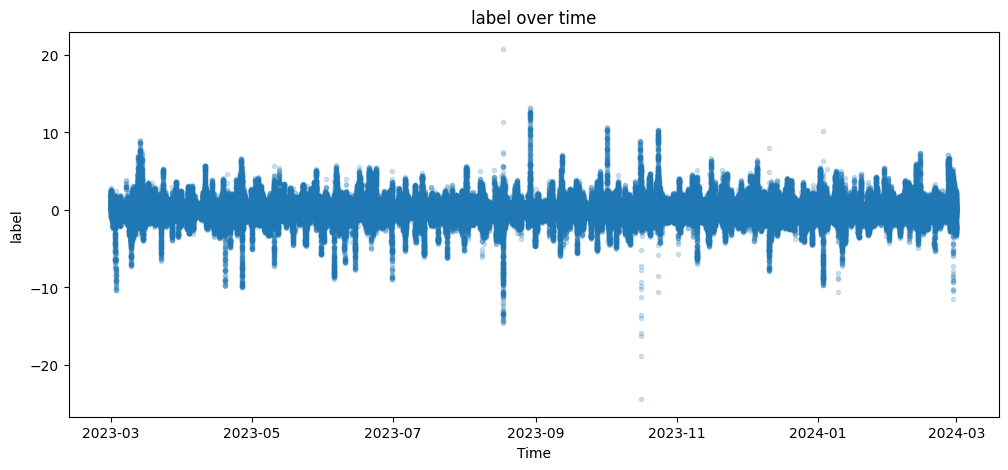

In [15]:
# using index as time column

time_col = train.index
print('Time column is the DataFrame index.')
print(f'Time range: {time_col.min()} to {time_col.max()}')
print(f'Number of unique timestamps: {len(time_col.unique())}')
# Plot target over time
plt.figure(figsize=(12,5))
plt.plot(time_col, train[target_col], '.', alpha=0.2)
plt.xlabel('Time')
plt.ylabel(target_col)
plt.title(f'{target_col} over time')
plt.show()